In [2]:
from brian2 import * 
import timeit
prefs.codegen.target = "numpy"

In [ ]:
start = timeit.default_timer()

tau = 20*ms
n = 51
b = 1.2
freq = 10*Hz

eqs = '''
dv/dt = (-v + a * sin(2 * pi * freq * t) + b) / tau : 1
a : 1
'''

neurons = NeuronGroup(n, model=eqs, threshold='v>1', reset='v=0', method='rk2')
neurons.v = 'rand()'
neurons.a = '0.05 + 0.7*i/n'
S = SpikeMonitor(neurons)
trace = StateMonitor(neurons, 'v', record=50)

run(1000*ms)
subplot(211)
plot(S.t/ms, S.i, '.k')
xlabel('Time (ms)')
ylabel('Neuron index')
subplot(212)
plot(trace.t/ms, trace.v.T)
xlabel('Time (ms)')
ylabel('v')
tight_layout()
show()

stop = timeit.default_timer()
print(stop - start)

start = timeit.default_timer()

tau = 20*ms
n = 51
b = 1.2
freq = 10*Hz

eqs = '''
dv/dt = (-v + a * sin(2 * pi * freq * t) + b) / tau : 1
a : 1
'''

neurons = NeuronGroup(n, model=eqs, threshold='v>1', reset='v=0', method='rk4')
neurons.v = 'rand()'
neurons.a = '0.05 + 0.7*i/n'
S = SpikeMonitor(neurons)
trace = StateMonitor(neurons, 'v', record=50)

run(1000*ms)
subplot(211)
plot(S.t/ms, S.i, '.k')
xlabel('Time (ms)')
ylabel('Neuron index')
subplot(212)
plot(trace.t/ms, trace.v.T)
xlabel('Time (ms)')
ylabel('v')
tight_layout()
show()

stop = timeit.default_timer()
print(stop - start)

In [ ]:
print(neurons.v)


In [ ]:
print(neurons.a)

In [ ]:
G = NeuronGroup(10, 'dv/dt = -v / tau : volt')
S = Synapses(G, G, model='w:1')
S.connect('i!=j')
monitors = [SpikeMonitor(G), StateMonitor(G, 'v', record=True)]

# a simple run would not include the monitors
net = Network(collect())  # automatically include G and S
net.add(monitors)  # manually add the monitors

net.run(10*ms)

Maximum interaural delay: 0.66666667 ms


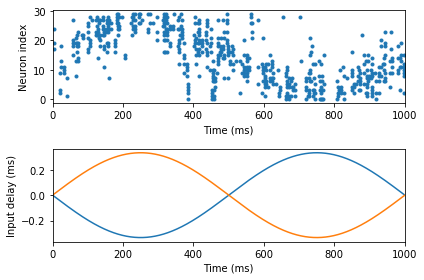

In [3]:
defaultclock.dt = .02*ms

# Sound
sound = TimedArray(10 * randn(50000), dt=defaultclock.dt) # white noise

# Ears and sound motion around the head (constant angular speed)
sound_speed = 300*metre/second
interaural_distance = 20*cm # big head!
max_delay = interaural_distance / sound_speed
print("Maximum interaural delay: %s" % max_delay)
angular_speed = 2 * pi / second # 1 turn/second
tau_ear = 1*ms
sigma_ear = .1
eqs_ears = '''
dx/dt = (sound(t-delay)-x)/tau_ear+sigma_ear*(2./tau_ear)**.5*xi : 1 (unless refractory)
delay = distance*sin(theta) : second
distance : second # distance to the centre of the head in time units
dtheta/dt = angular_speed : radian
'''
ears = NeuronGroup(2, eqs_ears, threshold='x>1', reset='x = 0',
                   refractory=2.5*ms, name='ears', method='euler')
ears.distance = [-.5 * max_delay, .5 * max_delay]
traces = StateMonitor(ears, 'delay', record=True)
# Coincidence detectors
num_neurons = 30
tau = 1*ms
sigma = .1
eqs_neurons = '''
dv/dt = -v / tau + sigma * (2 / tau)**.5 * xi : 1
'''
neurons = NeuronGroup(num_neurons, eqs_neurons, threshold='v>1',
                      reset='v = 0', name='neurons', method='euler')

synapses = Synapses(ears, neurons, on_pre='v += .5')
synapses.connect()

synapses.delay['i==0'] = '(1.0*j)/(num_neurons-1)*1.1*max_delay'
synapses.delay['i==1'] = '(1.0*(num_neurons-j-1))/(num_neurons-1)*1.1*max_delay'

spikes = SpikeMonitor(neurons)

run(1000*ms)

# Plot the results
i, t = spikes.it
subplot(2, 1, 1)
plot(t/ms, i, '.')
xlabel('Time (ms)')
ylabel('Neuron index')
xlim(0, 1000)
subplot(2, 1, 2)
plot(traces.t/ms, traces.delay.T/ms)
xlabel('Time (ms)')
ylabel('Input delay (ms)')
xlim(0, 1000)
tight_layout()
show()
